# Hypothesis Testing
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?
**Null Hypothesis:** The network latency has gone down or remained constant since switching providers

**Alternative Hypothesis:** The network latency has gone up since switching

**True positive:** We reject the null hypothesis, the network latency indeed went up

**True negative:** We accept the null hypothesis, the network latency did not go up

**Type I Error:** The network latency appeared to go up, but did not.

**Type II Error:** The network latency did not appear to go up, but it did.


## Is the website redesign any good?
**Null Hypothesis:** The website redesign negatively or did not affect customer retention

**Alternative Hypothesis:** The website redesign positively impacted customer retention

**True positive:** We reject the null hypothesis, The website redesign indeed improved customer retention

**True negative:** We accept the null hypothesis, The website redesign did not improve customer retention

**Type I Error:** The website redesign appeared to improve customer retention, but did not.

**Type II Error:** The website redesign did not appear to improve customer retention, but it did.

## Is our television ad driving more sales?
**Null Hypothesis:** Our ad is not driving or not affecting sales

**Alternative Hypothesis:** Our ad is driving more sales

**True positive:** We reject the null hypothesis, our ad indeed drove more sales

**True negative:** We accept the null hypothesis, our ad did not drive more sales

**Type I Error:** Our ad appeared to drive more sales, but did not.

**Type II Error:** Our ad did not appear to drive more sales, but did.

# T-Test Exercises

In [1]:
from pydataset import data
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ace Realty

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

$H_0$ = There is no difference in sale time between the two offices.

$H_a$ = There is a difference in sale time between the two offices.

In [2]:
# Create random values and set alpha
office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)
alpha = .05

(array([5., 2., 3., 9., 5., 8., 2., 4., 1., 1.]),
 array([ 63.12361757,  69.21202539,  75.30043321,  81.38884103,
         87.47724885,  93.56565667,  99.65406449, 105.7424723 ,
        111.83088012, 117.91928794, 124.00769576]),
 <BarContainer object of 10 artists>)

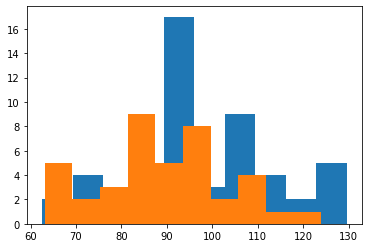

In [3]:
# Plot the distributions.
plt.hist(office2)
plt.hist(office1)

In [4]:
# Verify: Independent variables, normal distribution, equal variance...
office1.var(), office2.var()

(193.76097631846977, 245.33300555246606)

In [5]:
# Variance is not equal
# Calculate t and p
t, p = stats.ttest_ind(office1, office2, equal_var=False)
t, p 

(-2.9895582586968756, 0.003632576371980838)

In [6]:
# Is there a difference in sales time?
if p/2 > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis') 

We reject the null hypothesis


In [7]:
# Safe test
stats.mannwhitneyu(office1, office2)

MannwhitneyuResult(statistic=640.0, pvalue=0.001755034379047445)

## mpg dataset

In [8]:
# Load the mpg dataset
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
$H_0$ = There is no difference in fuel efficiency for cars made in 1999 and 2008.

$H_a$ = There is a difference in fuel efficiency for cars made in 1999 and 2008.

In [9]:
# Set alpha
alpha = .05

(array([ 5., 12., 24., 17., 16., 20., 16.,  3.,  3.,  1.]),
 array([ 9. , 10.9, 12.8, 14.7, 16.6, 18.5, 20.4, 22.3, 24.2, 26.1, 28. ]),
 <BarContainer object of 10 artists>)

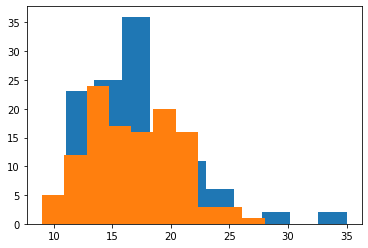

In [10]:
# Plot the distributions
plt.hist(df[df.year == 1999].cty)
plt.hist(df[df.year == 2008].cty)

In [11]:
# Verify assumptions: Normal-ish distribution, Independent variables, equal variance...
df[df.year == 1999].cty.var(), df[df.year == 2008].cty.var()

(19.879015620394938, 16.452844090775127)

In [12]:
# Compute t and p
t, p = stats.ttest_ind(df[df.year == 1999].cty, df[df.year == 2008].cty)
t, p

(0.5674988409997608, 0.5709240495406107)

In [13]:
# Is there a difference in fuel efficiency?
if p/2 > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis') 

We accept the null hypothesis


In [14]:
# Safe test
stats.mannwhitneyu(df[df.year == 1999].cty, df[df.year == 2008].cty)

MannwhitneyuResult(statistic=6790.5, pvalue=0.45870813783633435)

### Are compact cars more fuel-efficient than the average car?
$H_0$ = Compact cars are not more fuel efficient than the average car.

$H_a$ = Compact cars are more fuel efficient than the average car.

In [15]:
# Set alpha
alpha = .05

(array([ 5., 11., 10., 15.,  0.,  2.,  2.,  1.,  0.,  1.]),
 array([15. , 16.8, 18.6, 20.4, 22.2, 24. , 25.8, 27.6, 29.4, 31.2, 33. ]),
 <BarContainer object of 10 artists>)

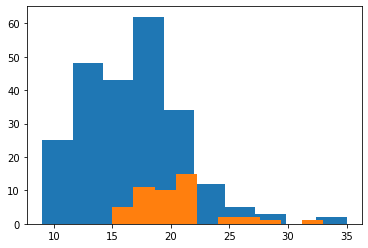

In [16]:
# Plot the distributions
plt.hist(df.cty)
plt.hist(df[df['class'] == 'compact'].cty)

In [17]:
# Establish hypothesis: H_0 = No, H_a = Yes
# Set alpha: alpha = .05
# Verify assumptions: Normal-ish distribution
df[df['class'] == 'compact'].cty.var(), df.cty.var()

(11.46160962072155, 18.1130736216573)

In [18]:
# Compute t and p
t, p = stats.ttest_1samp(df[df['class'] == 'compact'].cty, df.cty.mean())
t, p

(6.6191042534408915, 3.4017448216394005e-08)

In [19]:
# Are compact cars more fuel efficient?
if t > 0 and p < 0.05:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?
$H_0$ = Manual cars do not get better gas mileage than automatic cars.

$H_a$ = Manual cars get better gas mileage than automatic cars.

In [20]:
# Set alpha
alpha = .05

<AxesSubplot:>

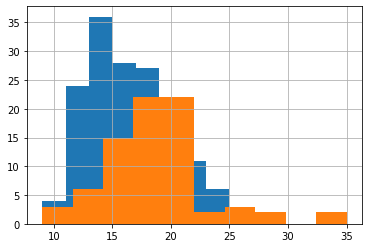

In [21]:
# Plot the distributions
df[df.trans.str.startswith('auto')].cty.hist()
df[df.trans.str.startswith('manual')].cty.hist()

In [22]:
# Null: H_0 = No, H_a = Yes
# alpha = .05
# Verify: Independent variables, normal distribution, equal variance...
df[df.trans.str.startswith('auto')].cty.var(), df[df.trans.str.startswith('manual')].cty.var()

(14.81308182263596, 20.14319890635681)

In [23]:
# Calculate t and p
t, p = stats.ttest_ind(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)
t, p

(4.781718413818975, 3.088973514167085e-06)

In [24]:
# Do manual cars get better gas mileage than automatic cars?
if t > 0 and p < 0.05:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

We reject the null hypothesis


In [25]:
# Safe test
stats.mannwhitneyu(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)

MannwhitneyuResult(statistic=3814.5, pvalue=2.1320221166439075e-06)

# Correlations Exercises

## telco_churn data

In [26]:
df = pd.read_csv('Cust_Churn_Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Does tenure correlate with monthly charges?

In [27]:
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [28]:
p < .05

True

### Total charges?

In [29]:
corr, p = stats.pearsonr(df[df.TotalCharges > 0].tenure, df[df.TotalCharges > 0].TotalCharges)
corr, p

(0.8258804609332093, 0.0)

In [30]:
p < .05

True

### What happens if you control for phone and internet service?

#### With phone service

In [31]:
corr, p = stats.pearsonr(df[df.PhoneService == 'Yes'].tenure, df[df.PhoneService == 'Yes'].MonthlyCharges)
corr, p

(0.2453889858536324, 7.117871077925186e-88)

In [32]:
p < .05

True

#### Without phone service

In [33]:
corr, p = stats.pearsonr(df[df.PhoneService == 'No'].tenure, df[df.PhoneService == 'No'].MonthlyCharges)
p < .05

True

#### DSL

In [34]:
corr, p = stats.pearsonr(df[df.InternetService == 'DSL'].tenure, df[df.InternetService == 'DSL'].MonthlyCharges)
p < .05

True

#### Fiber Optic

In [35]:
corr, p = stats.pearsonr(df[df.InternetService == 'Fiber optic'].tenure, df[df.InternetService == 'Fiber optic'].MonthlyCharges)
p < .05

True

#### Without internet service

In [36]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [37]:
corr, p = stats.pearsonr(df[df.InternetService == 'No'].tenure, df[df.InternetService == 'No'].MonthlyCharges)
p < .05

True

## employees database

In [38]:
import env
url = env.get_db_url('employees', )

### Is there a relationship between how long an employee has been with the company and their salary?
$H_0$ = There is not a relationship between tenure and salary.

$H_a$ = There is a relationship between tenure and salary.

In [39]:
# Create dataframe with tenure and max salary of each employee
sql =   """
            SELECT emp_no, 
                SUM(datediff(to_date, from_date)) as tenure, 
                MAX(salary) as max_salary
            FROM salaries
            WHERE to_date < curdate()
            GROUP BY emp_no;
        """
df = pd.read_sql(sql, url)
df.head()

,emp_no,tenure,max_salary
0,10001,5840.0,85112
1,10002,1825.0,71963
2,10003,2190.0,43699
3,10004,5475.0,70698
4,10005,4380.0,91453


In [40]:
# Set alpha
alpha = .05

In [41]:
# Calculate correlation and p-value
corr, p = stats.pearsonr(df.tenure, df.max_salary)
corr, p

(0.5236371831581195, 0.0)

In [42]:
# Is there a relationship?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?
$H_0$ = There is not a relationship between tenure and number of titles.

$H_a$ = There is a relationship between tenure and number of titles.

In [43]:
# Grab tenure and title count
sql =   """
            SELECT emp_no, COUNT(title) as titles
            FROM titles
            GROUP BY emp_no;
        """
df2 = pd.read_sql(sql, url)
df2.head(10)

,emp_no,titles
0,10001,1
1,10002,1
2,10003,1
3,10004,2
4,10005,2
5,10006,1
6,10007,2
7,10008,1
8,10009,3
9,10010,1


In [44]:
# Merge this query with previous dataframe
df = df.merge(df2, on='emp_no')
df.head(10)

,emp_no,tenure,max_salary,titles
0,10001,5840.0,85112,1
1,10002,1825.0,71963,1
2,10003,2190.0,43699,1
3,10004,5475.0,70698,2
4,10005,4380.0,91453,2
5,10006,4015.0,60098,1
6,10007,4745.0,84456,2
7,10008,873.0,52668,1
8,10009,6205.0,94443,3
9,10010,1825.0,79580,1


In [45]:
# Set alpha
alpha = .05

In [46]:
# Calculate correlation and p-value
corr, p = stats.pearsonr(df.tenure, df.titles)
corr, p

(0.5929107912235184, 0.0)

In [47]:
# Is there a relationship?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


## sleepstudy data

### Is there a relationship between days and reaction time?

In [48]:
# Grab sleepstudy dataset
sleepy = data('sleepstudy')
sleepy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [49]:
# Calculate correlation and p-value
stats.pearsonr(sleepy.Days, sleepy.Reaction)

(0.5352302262650253, 9.894096322214812e-15)

In [50]:
# Is there a relationship?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


## Chi2 Exercises

### Using the following contingency table...

In [51]:
df = pd.DataFrame({'Codeup_Student':[49,1], 'Not_Codeup_Student':[20,30], 'MacBook':['Uses a MacBook', 'Doesn\'t Use a MacBook']})
df = df.set_index(df.MacBook)
df = df.drop(columns='MacBook')
df

,Codeup_Student,Not_Codeup_Student
MacBook,,
Uses a MacBook,49,20
Doesn't Use a MacBook,1,30


### ...answer the question of whether using a macbook and being a codeup student are independent of each other.

$H_0$ = Using a MacBook and being a Codeup student are not independent of each other.

$H_a$ = Using a MacBook and being a Codeup student are independent of each other.

In [52]:
# Set alpha
alpha = .05

In [53]:
# Run chi2 contingency
chi2, p, degf, expected = stats.chi2_contingency(df)

In [54]:
# Are they independent?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


### Using another 2 categorical variables from the mpg dataset... 

In [55]:
# Grab dataset
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [56]:
# Check potential categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [57]:
# Crosstab of fueltype and car's class
observed = pd.crosstab(df['fl'], df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
fl,,,,,,,
c,0,0,0,0,0,1,0
d,0,1,0,0,0,2,2
e,0,0,0,1,3,0,4
p,5,21,15,0,0,3,8
r,0,25,26,10,30,29,48


### ...perform a chi2_contingency table test. Be sure to state your null and alternative hypotheses.



$H_0$ = Fuel type and class are not independent of one another.

$H_a$ = Fuel type and class are independent of one another.

In [58]:
# Set alpha
alpha = .05

In [59]:
# Run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [60]:
# Are they independent?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


### Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [61]:
import env
url = env.get_db_url('employees', )

#### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
$H_0$ = Gender is not independent of working in sales or marketing

$H_a$ = Gender is independent of working in sales or marketing

In [62]:
# Grab current sales and marketing employees and their gender
sql =   """
            SELECT gender, dept_no
            FROM employees
            JOIN dept_emp USING(emp_no)
            WHERE ((dept_no = 'd001') OR (dept_no = 'd007')) AND to_date > curdate();
        """

df = pd.read_sql(sql, url)
df.info

<bound method DataFrame.info of       gender dept_no
0          F    d007
1          M    d007
2          F    d001
3          F    d007
4          M    d007
...      ...     ...
52538      M    d007
52539      M    d007
52540      F    d007
52541      F    d007
52542      F    d001

[52543 rows x 2 columns]>

In [63]:
# Create crosstab
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,d001,d007
gender,,
F,5864,14999
M,8978,22702


In [64]:
# set alpha
alpha = .05

In [65]:
# Run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [66]:
# Are they independent?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We accept the null hypothesis


#### Is an employee's gender independent of whether or not they are or have been a manager?
$H_0$ = Gender is not independent of managerial status

$H_a$ = Gender is independent of managerial status

In [67]:
# Create dataframe for all employees including managers
sql1 =  """
            SELECT emp_no, gender
            FROM employees;
        """
df1 = pd.read_sql(sql1, url)

# Create dataframe for all managers specifically
sql2 =  """
            SELECT emp_no
            FROM dept_manager
        """
df2 = pd.read_sql(sql2, url)

# Check for good copy
df1.info, df2.info

(<bound method DataFrame.info of         emp_no gender
 0        10001      M
 1        10002      F
 2        10003      M
 3        10004      M
 4        10005      M
 ...        ...    ...
 300019  499995      F
 300020  499996      M
 300021  499997      M
 300022  499998      M
 300023  499999      M
 
 [300024 rows x 2 columns]>,
 <bound method DataFrame.info of     emp_no
 0   110022
 1   110039
 2   110085
 3   110114
 4   110183
 5   110228
 6   110303
 7   110344
 8   110386
 9   110420
 10  110511
 11  110567
 12  110725
 13  110765
 14  110800
 15  110854
 16  111035
 17  111133
 18  111400
 19  111534
 20  111692
 21  111784
 22  111877
 23  111939>)

In [68]:
# Create dataframe with all employees and whether the employee is a manager or not
df1['Manager'] = df1.emp_no.isin(df2.emp_no)
df1.head(10)

,emp_no,gender,Manager
0,10001,M,False
1,10002,F,False
2,10003,M,False
3,10004,M,False
4,10005,M,False
5,10006,F,False
6,10007,F,False
7,10008,M,False
8,10009,F,False
9,10010,F,False


In [69]:
# Create crosstab of gender and managerial status
observed = pd.crosstab(df1.gender, df1.Manager)
observed

Manager,False,True
gender,,
F,120038,13
M,179962,11


In [70]:
# Set alpha
alpha = .05

In [71]:
# Run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [72]:
# Are they independent?
if p > alpha:
    print('We accept the null hypothesis')
else:
    print('We reject the null hypothesis')

We accept the null hypothesis
